In [2]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Unzip dat file "2015PDPDatabase.zip" into data folder.    

Load in text file of results and sample as a dataframe and add column headers according to PDP_DataDictionary_2015.pdf

In [3]:
results_2015 = pd.read_csv('data/2015PDPDatabase/PDP15Results.txt', delimiter = '|')
results_2015.columns = ['SAMPLE_PK', 'COMMOD', 'COMMTYPE', 'LAB', 'PESTCODE', 'TESTCLASS', 'CONCEN', 'LOD', 'CONUNIT', 'CONFMETHOD', 'CONFMETHOD2', 'ANNOTATE', 'QUANTITATE', 'MEAN', 'EXTRACT','DETERMIN'] 


In [4]:
samples_2015 = pd.read_csv('data/2015PDPDatabase/PDP15Samples.txt', delimiter = '|')
samples_2015.columns = ['SAMPLE_PK', 'STATE', 'YEAR', 'MONTH', 'DAY', 'SITE', 'COMMOD', 'SOURCE_ID', 'VARIETY', 'ORIGIN', 'COUNTRY', 'DISTTYPE', 'COMMTYPE', 'CLAIM', 'QUANTITY', 'GROWST','PACKST', 'DISTST'] 


Filter dataframe and replace abbreviations for Label Claim with full text

In [5]:
commod = results_2015.groupby(['SAMPLE_PK', 'COMMOD'], as_index=False)[['CONCEN', 'PESTCODE']].count()
commod.rename(columns = {'CONCEN':'Pests. Detected', 'PESTCODE':'Pests. Analyzed'}, inplace = True)
commod = pd.merge(commod, samples_2015[['SAMPLE_PK','CLAIM', 'QUANTITY', 'ORIGIN', 'COUNTRY']], on= 'SAMPLE_PK')
commod['Claim_full'] = commod['CLAIM'].transform(lambda x: 'No Claim' if x == 'NC' else ('Organic' if x == 'PO' else ('Other' if x == 'OT' else ('Pesticide Free' if x == 'PP' else x))))


In [1]:
# Create dataframe grouped by Commodity Name, Label Claim and Pesticide
top = commod.groupby(['COMMOD','Claim_full'], as_index = False)['Pests. Detected'].mean()
commodity = pd.read_csv('data/2015PDPDatabase/Commodity_List_2015.txt', delimiter = '\t')
commodity.rename(columns = {'Commodity Code':'COMMOD'}, inplace = True)
top = pd.merge(top, commodity, on = 'COMMOD')

# Group dataframe by count of Origin (Domestic or Imported)
origin = (commod.groupby(['COMMOD', 'Claim_full', 'ORIGIN'])['ORIGIN'].count())
origin_df = pd.DataFrame(origin)
origin_df.columns = ['Counts']
origin_df.reset_index(inplace = True)

# Group dataframe by counts of Label Claim
total_claims = pd.DataFrame(origin_df.groupby(['COMMOD', 'Claim_full'])['Counts'].sum())
total_claims.columns = ['Counts']
total_claims.reset_index(inplace = True)

# Replace numbers used for Origin with full text (i.e. 1 = Doemstic, 2 =Imported, 3 = Unknown Origin
# Group dataframe by sum of Origin
origin_df2 = pd.merge(origin_df, total_claims, on=['COMMOD','Claim_full'], suffixes=['_sub', '_total'])
origin_df2['Breakdown'] = round(origin_df2['Counts_sub']/origin_df2['Counts_total'], 4)
origin_type = pd.DataFrame({'ORIGIN':[1, 2, 3], 'Origin of Sample':['Domestic (U.S)','Imported', 'Unknown Origin']})
origin_df2 = pd.merge(origin_df2, origin_type, on='ORIGIN', how='left')
origin_df3 = origin_df2.drop(['ORIGIN', 'Counts_sub', 'Counts_total'], axis = 1)
totals_commod = origin_df.groupby(['COMMOD'])['Counts'].sum()

# Create dataframed based on top 5 commodities with the most pesticdes detected, for each label claim
top_five_OT = top[top['Claim_full']=='Other'].nlargest(5, 'Pests. Detected')
top_five_PO = top[top['Claim_full']=='Organic'].nlargest(5, 'Pests. Detected')
top_five_NC = top[top['Claim_full']=='No Claim'].nlargest(5, 'Pests. Detected')
top_five_PP = top[top['Claim_full']=='Pesticide Free'].nlargest(5, 'Pests. Detected')

NameError: name 'commod' is not defined

In [627]:
# Create dataframe for stacked barchart from top 5 commodities with the most pesticdes detected, with "Other" label claim

top_five_OT_bk1 = origin_df3[(origin_df3['COMMOD']==top_five_OT.iloc[0, 0]) & (origin_df3['Claim_full']=='Other')]
top_five_OT_bk2 = origin_df3[(origin_df3['COMMOD']==top_five_OT.iloc[1, 0]) & (origin_df3['Claim_full'] == 'Other')]
top_five_OT_bk3 = origin_df3[(origin_df3['COMMOD']==top_five_OT.iloc[2, 0]) & (origin_df3['Claim_full']== 'Other')]
top_five_OT_bk4 = origin_df3[(origin_df3['COMMOD']==top_five_OT.iloc[3, 0]) & (origin_df3['Claim_full']== 'Other')]
top_five_OT_bk5 = origin_df3[(origin_df3['COMMOD']==top_five_OT.iloc[4, 0]) & (origin_df3['Claim_full']== 'Other')]

In [822]:
# Create dataframe for stacked barchart from top 5 commodities with the most pesticdes detected, with "Organic" label claim
top_five_PO_bk1 = origin_df3[(origin_df3['COMMOD']==top_five_PO.iloc[0, 0]) & (origin_df3['Claim_full']=='Organic')]
top_five_PO_bk2 = origin_df3[(origin_df3['COMMOD']==top_five_PO.iloc[1, 0]) & (origin_df3['Claim_full'] == 'Organic')]
top_five_PO_bk3 = origin_df3[(origin_df3['COMMOD']==top_five_PO.iloc[2, 0]) & (origin_df3['Claim_full']== 'Organic')]
top_five_PO_bk4 = origin_df3[(origin_df3['COMMOD']==top_five_PO.iloc[3, 0]) & (origin_df3['Claim_full']== 'Organic')]
top_five_PO_bk5 = origin_df3[(origin_df3['COMMOD']==top_five_PO.iloc[4, 0]) & (origin_df3['Claim_full']== 'Organic')]


In [823]:
# Create dataframe for stacked barchart from top 5 commodities with the most pesticdes detected, with "No Claim" label claim
top_five_NC_bk1 = origin_df3[(origin_df3['COMMOD']==top_five_NC.iloc[0, 0]) & (origin_df3['Claim_full']=='No Claim')]
top_five_NC_bk2 = origin_df3[(origin_df3['COMMOD']==top_five_NC.iloc[1, 0]) & (origin_df3['Claim_full'] == 'No Claim')]
top_five_NC_bk3 = origin_df3[(origin_df3['COMMOD']==top_five_NC.iloc[2, 0]) & (origin_df3['Claim_full']== 'No Claim')]
top_five_NC_bk4 = origin_df3[(origin_df3['COMMOD']==top_five_NC.iloc[3, 0]) & (origin_df3['Claim_full']== 'No Claim')]
top_five_NC_bk5 = origin_df3[(origin_df3['COMMOD']==top_five_NC.iloc[4, 0]) & (origin_df3['Claim_full']== 'No Claim')]

In [824]:
# Create datafrane for stacked barchart from top 5 commodities with the most pesticdes detected, with "Pesticide Free" label claim
top_five_PP_bk1 = origin_df3[(origin_df3['COMMOD']==top_five_PP.iloc[0, 0]) & (origin_df3['Claim_full']=='Pesticide Free')]

In [737]:
# Create array for plotting stacked barchart, showing top 5 commodities with "No Claim" label claim, with each bar showing the proportions of origin status
NC = np.zeros((5, 3))
NC[0] = top_five_NC_bk1['Breakdown']*top_five_NC.iloc[0, 2]
a = (list(top_five_NC_bk2['Breakdown']*top_five_NC.iloc[1, 2]))
a.append(0)
NC[1] = np.array(a)
NC[2] = top_five_NC_bk3['Breakdown']*top_five_NC.iloc[2, 2]
b = (list(top_five_NC_bk4['Breakdown']*top_five_NC.iloc[3, 2]))
b.append(0)

NC[3] = np.array(b)
NC[4] = top_five_NC_bk5['Breakdown']*top_five_NC.iloc[4, 2]
NC

array([[7.56891856, 0.2319975 , 0.03683744],
       [6.85686717, 0.85527676, 0.        ],
       [4.16681588, 2.23525608, 0.03217122],
       [3.93606316, 1.40604211, 0.        ],
       [3.28186927, 1.98801989, 0.00950195]])

In [806]:
# Create array for plotting stacked barchart, showing top 5 commodities with "Other" label claim, with each bar showing the proportions of origin status

OT = np.zeros((5, 3))
a = list(top_five_OT_bk1['Breakdown']*top_five_OT.iloc[0, 2])
a.append(0)
OT[0] = np.array(a)
OT[1] = top_five_OT_bk2['Breakdown']*top_five_OT.iloc[1, 2]
b = list(top_five_OT_bk3['Breakdown']*top_five_OT.iloc[2, 2])
b.append(0)
OT[2] = np.array(b)
c = list(top_five_OT_bk4['Breakdown']*top_five_OT.iloc[3, 2])
c.append(0)
OT[3] = np.array(c)
OT[4] = top_five_OT_bk5['Breakdown']*top_five_OT.iloc[4, 2]
OT[1, 1:] = 0
OT[4, 1:] = 0
OT

array([[6.667 , 3.333 , 0.    ],
       [9.6   , 0.    , 0.    ],
       [2.48  , 3.72  , 0.    ],
       [5.5002, 0.4998, 0.    ],
       [4.    , 0.    , 0.    ]])

In [1107]:
# Create array for plotting stacked barchart, showing top 5 commodities with "Organic" label claim, with each bar showing the proportions of origin status

PO = np.zeros((5, 3))
a = list(top_five_PO_bk1['Breakdown']*top_five_PO.iloc[0, 2])
a.append(0)
PO[0] = np.array(a)
b = list(top_five_PO_bk2['Breakdown']*top_five_PO.iloc[1, 2])
b.append(0)
PO[1] = np.array(b)
PO[2] = top_five_PO_bk3['Breakdown']*top_five_PO.iloc[2, 2]
c = list(top_five_PO_bk4['Breakdown']*top_five_PO.iloc[3, 2])
c.append(0)
PO[3] = np.array(c)
d = list(top_five_PO_bk5['Breakdown']*top_five_PO.iloc[4, 2])
d.append(0)
PO[4] = np.array(d)
PO[2,1:] = 0
PO

array([[2.61565091, 0.51162182, 0.        ],
       [1.07895556, 1.4766    , 0.        ],
       [1.25      , 0.        , 0.        ],
       [1.0546875 , 0.0703125 , 0.        ],
       [0.5       , 0.5       , 0.        ]])

In [845]:
# Create dataframe for plotting stacked barchart, showing top 5 commodities with "Pesticide Free" label claim, with each bar showing the proportions of origin status

PP = np.zeros((1, 3))
PP[0] = top_five_PP_bk1['Breakdown']*top_five_PP.iloc[0, 2]
PP[0, 1:] = 0
PP

array([[4., 0., 0.]])

In [1109]:
# Create dataframne from array for plotting stacked bar charts for of top 5 commodities with the most pesticides.
NC_chart_df = pd.DataFrame(NC, index = top_five_NC['Commodity Name'], columns = top_five_NC_bk1['Origin of Sample'])
NC_chart_df.index.names = ['']
OT_chart_df = pd.DataFrame(OT, index = top_five_OT['Commodity Name'], columns = top_five_NC_bk1['Origin of Sample'])
OT_chart_df.index.names = ['']
PO_chart_df = pd.DataFrame(PO, index = top_five_PO['Commodity Name'], columns = top_five_NC_bk1['Origin of Sample'])
PO_chart_df.index.names = ['']
PP_chart_df = pd.DataFrame(PP, index = top_five_PP['Commodity Name'], columns = top_five_NC_bk1['Origin of Sample'])
PP_chart_df.index.names = ['']

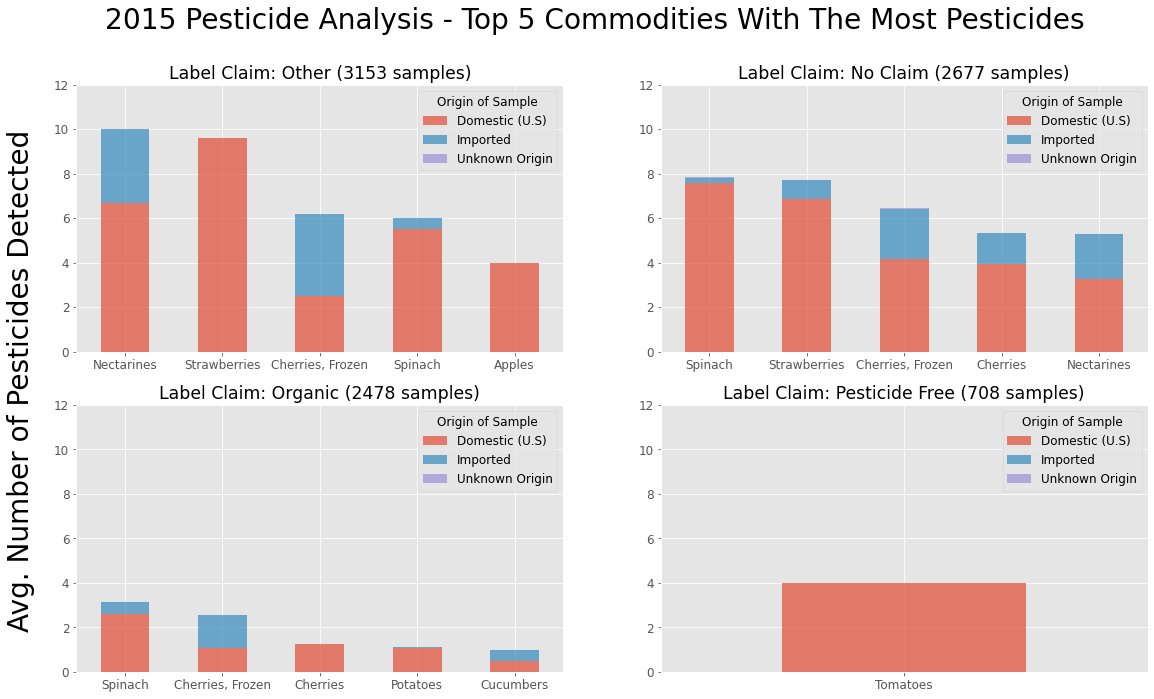

In [1114]:
# Create figure for Top 5 Commodities with the most pesticides 
fig, ax = plt.subplots(2, 2, sharey = True, figsize = (19.20, 10.80)) #(32,26)
plt.rcParams['font.size'] = 12

fig.suptitle('2015 Pesticide Analysis - Top 5 Commodities With The Most Pesticides', fontsize = 28)
fig.text(0.075, 0.5, 'Avg. Number of Pesticides Detected', va='center', rotation='vertical', fontsize  = 28)
label = ['Other', 'No Claim', 'Organic', 'Pesticide Free']


ax1 = plt.subplot(221)
OT_chart_df.plot(ax = ax1, kind='bar', stacked=True, title ='Label Claim: {} ({} samples)'.format(label[0], top_five_OT['# of Samples Analyzed'].sum()), alpha = 0.7)
ax1.set_ylim(0, 12)

ax2 = plt.subplot(222)
NC_chart_df.plot(ax = ax2, kind='bar', stacked=True, title ='Label Claim: {} ({} samples)'.format(label[1], top_five_NC['# of Samples Analyzed'].sum()), alpha = 0.7)
ax2.set_ylim(0, 12)

ax3 = plt.subplot(223)
PO_chart_df.plot(ax = ax3, kind='bar', stacked=True, title ='Label Claim: {} ({} samples)'.format(label[2], top_five_PO['# of Samples Analyzed'].sum()), alpha = 0.7)
ax3.set_ylim(0, 12)

ax4 = plt.subplot(224)
PP_chart_df.plot(ax = ax4, kind='bar', stacked=True, title ='Label Claim: {} ({} samples)'.format(label[3], top_five_PP['# of Samples Analyzed'].sum()), alpha = 0.7)
ax4.set_ylim(0, 12)

plt.draw()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, ha='center')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, ha='center')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0, ha='center')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0, ha='center')

plt.savefig('Top5Comm_MostPests.svg', format = 'svg', dpi = 1200)
plt.show()

In [75]:
#  Create dataframe for Spinach Commodity
spinach = results_2015[(results_2015['CONCEN'].notnull()==True) &(results_2015['COMMOD']=='SP')]
spinach = pd.merge(spinach, samples_2015[['SAMPLE_PK','CLAIM', 'QUANTITY', 'ORIGIN', 'COUNTRY']], on= 'SAMPLE_PK')
spinach['Claim_full'] = spinach['CLAIM'].transform(lambda x: 'No Claim' if x == 'NC' else ('Organic' if x == 'PO' else ('Other' if x == 'OT' else ('Pesticide Free' if x == 'PP' else x))))
pest_code = pd.read_csv('pesticide-data-program-All-2020-10-20_2156/2015PDPDatabase/Pest_Code_2015.txt', delimiter = '\t')
pest_code.rename(columns = {'Pest Code':'PESTCODE'}, inplace = True)
spinach = pd.merge(spinach, pest_code, on = 'PESTCODE')
spinach = pd.merge(spinach, commodity, on = 'COMMOD')
spinach_NC =spinach[spinach['Claim_full']=='No Claim', as_index=False].groupby('Pesticide Name')['CONCEN'].mean()


In [909]:
spinach[spinach['Claim_full']=='No Claim'].groupby()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5268 entries, 0 to 5267
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SAMPLE_PK              5268 non-null   int64  
 1   COMMOD                 5268 non-null   object 
 2   COMMTYPE               5268 non-null   object 
 3   LAB                    5268 non-null   object 
 4   PESTCODE               5268 non-null   object 
 5   TESTCLASS              5268 non-null   object 
 6   CONCEN                 5268 non-null   float64
 7   LOD                    5268 non-null   float64
 8   CONUNIT                5268 non-null   object 
 9   CONFMETHOD             5268 non-null   object 
 10  CONFMETHOD2            0 non-null      float64
 11  ANNOTATE               970 non-null    object 
 12  QUANTITATE             476 non-null    object 
 13  MEAN                   5268 non-null   object 
 14  EXTRACT                5268 non-null   int64  
 15  DETE

In [914]:
# Create dataframe of Spinach with "No Claim" label claim 
spinach_NC =spinach[spinach['Claim_full']=='No Claim'].groupby(['Pesticide Name', 'CONUNIT'], as_index=False)['CONCEN'].mean()

,Pesticide Name,CONUNIT,CONCEN
55,Permethrin cis,M,0.803124


In [130]:
# Create dataframe of Spinach with "Other" label claim
spinach_OT =spinach[spinach['Claim_full']=='Other'].groupby(['Pesticide Name', 'CONUNIT'], as_index=False)['CONCEN'].mean()

,Pesticide Name,CONUNIT,CONCEN


In [131]:
# Create dataframe of Spinach with "Organic" label claim
spinach_PO =spinach[spinach['Claim_full']=='Organic'].groupby(['Pesticide Name', 'CONUNIT'], as_index=False)['CONCEN'].mean()

,Pesticide Name,CONUNIT,CONCEN


In [132]:
# Create dataframe of Spinach with "Pesticide Free" label claim
spinach_PP =spinach[spinach['Claim_full']=='Pesticide Free'].groupby(['Pesticide Name', 'CONUNIT'], as_index=False)['CONCEN'].mean()

,Pesticide Name,CONUNIT,CONCEN


In [133]:
# Merge all Spinach Dataframes
spinach_FJ = pd.merge(spinach_NC, spinach_OT, on='Pesticide Name', how='outer')
spinach_FJ = pd.merge(spinach_FJ, spinach_PO, on='Pesticide Name', how='outer')

In [983]:
# Drop all N/A values from outer merge. Datframne will contain only common pesticdes for Other, Organic and No Claim dataframes
spinach_common = spinach_FJ.dropna()
spinach_common.rename(columns = {'CONCEN_x':'CONCEN_NC','CONCEN_y':'CONCEN_OT', 'CONCEN':'CONCEN_PO' }, inplace = True)
spinach_common.reset_index(inplace = True) 
spinach_common.index
spinach_common.head(50)

,index,Pesticide Name,CONUNIT_x,CONCEN_NC,CONUNIT_y,CONCEN_OT,CONUNIT,CONCEN_PO
0,2,Ametoctradin,M,1.402836,M,0.033000,M,0.086513
1,4,Azoxystrobin,M,0.963259,M,0.015000,M,0.002000
2,5,Bifenthrin,M,0.059090,M,0.002000,M,0.002850
3,9,Chlorantraniliprole,M,0.410610,M,0.320000,M,0.119375
4,13,Clothianidin,M,0.043872,M,0.060725,M,0.036375
5,17,"Cyhalothrin, Total (Cyhalothrin-L + R157836 ep...",M,0.058267,M,0.014000,M,0.005000
6,19,Cypermethrin,M,0.437677,M,0.100000,M,0.145000
7,23,"DDE p,p'",M,0.009316,M,0.011875,M,0.013867
8,24,"DDT o,p'",M,0.002183,M,0.002000,M,0.002000
9,25,"DDT p,p'",M,0.003059,M,0.004233,M,0.003700


In [1017]:
# Perfrom Welch's t-test on each of the common pesticides for all three label claims. Compare "No Claim" to "Oragnic" and "Other"  to "Organic" groups. 

spinach_NC_total =spinach[spinach['Claim_full']=='No Claim']
spinach_OT_total =spinach[spinach['Claim_full']=='Other']
spinach_PO_total =spinach[spinach['Claim_full']=='Organic']


alpha = 0.05

Pest_name = spinach['Pesticide Name'].unique()

Ttest_df_NC_PO = pd.DataFrame(columns=['Pesticide Name', 'NC-PO Diff.?', 'n_NC-PO' ])
Ttest_df_OT_PO = pd.DataFrame(columns=['Pesticide Name', 'OT-PO Diff.?', 'n_OT-PO'])
j = 0

for i in Pest_name:
    spinach_NC_ttest = spinach_NC_total[spinach_NC_total['Pesticide Name']==i]['CONCEN']
    spinach_PO_ttest = spinach_PO_total[spinach_PO_total['Pesticide Name']==i]['CONCEN']
    _, p_value = stats.ttest_ind(spinach_NC_ttest, spinach_PO_ttest, equal_var=False)
    Ttest_df_NC_PO.loc[j] = [i, (p_value<alpha), spinach_NC_ttest.count()]
    j +=1

j = 0

for i in Pest_name:
    spinach_OT_ttest = spinach_OT_total[spinach_OT_total['Pesticide Name']==i]['CONCEN']
    spinach_PO_ttest = spinach_PO_total[spinach_PO_total['Pesticide Name']==i]['CONCEN']
    _, p_value = stats.ttest_ind(spinach_OT_ttest, spinach_PO_ttest, equal_var=False)
    Count+=1
    Ttest_df_OT_PO.loc[j] = [i, (p_value<alpha), spinach_OT_ttest.count()]
    j +=1



In [1116]:
# Merge T-test data for Spinach for "No Claim" - "Organic" group and "Other" - "Organic" group 
spinach_common1 = pd.merge(spinach_common, Ttest_df_NC_PO, on= 'Pesticide Name')
spinach_common2 = pd.merge(spinach_common1, Ttest_df_OT_PO, on= 'Pesticide Name')


,index,Pesticide Name,CONUNIT_x,CONCEN_NC,CONUNIT_y,CONCEN_OT,CONUNIT,CONCEN_PO,NC-PO Diff.?,n_NC-PO,OT-PO Diff.?,n_OT-PO
0,2,Ametoctradin,M,1.402836,M,0.033000,M,0.086513,True,179,False,1
1,4,Azoxystrobin,M,0.963259,M,0.015000,M,0.002000,False,41,False,1
2,5,Bifenthrin,M,0.059090,M,0.002000,M,0.002850,False,58,False,2
3,9,Chlorantraniliprole,M,0.410610,M,0.320000,M,0.119375,True,240,False,2
4,13,Clothianidin,M,0.043872,M,0.060725,M,0.036375,False,212,False,4
5,17,"Cyhalothrin, Total (Cyhalothrin-L + R157836 ep...",M,0.058267,M,0.014000,M,0.005000,False,15,False,1
6,19,Cypermethrin,M,0.437677,M,0.100000,M,0.145000,True,130,False,1
7,23,"DDE p,p'",M,0.009316,M,0.011875,M,0.013867,False,314,False,4
8,24,"DDT o,p'",M,0.002183,M,0.002000,M,0.002000,False,42,False,1
9,25,"DDT p,p'",M,0.003059,M,0.004233,M,0.003700,False,87,False,3


<Figure size 432x288 with 0 Axes>

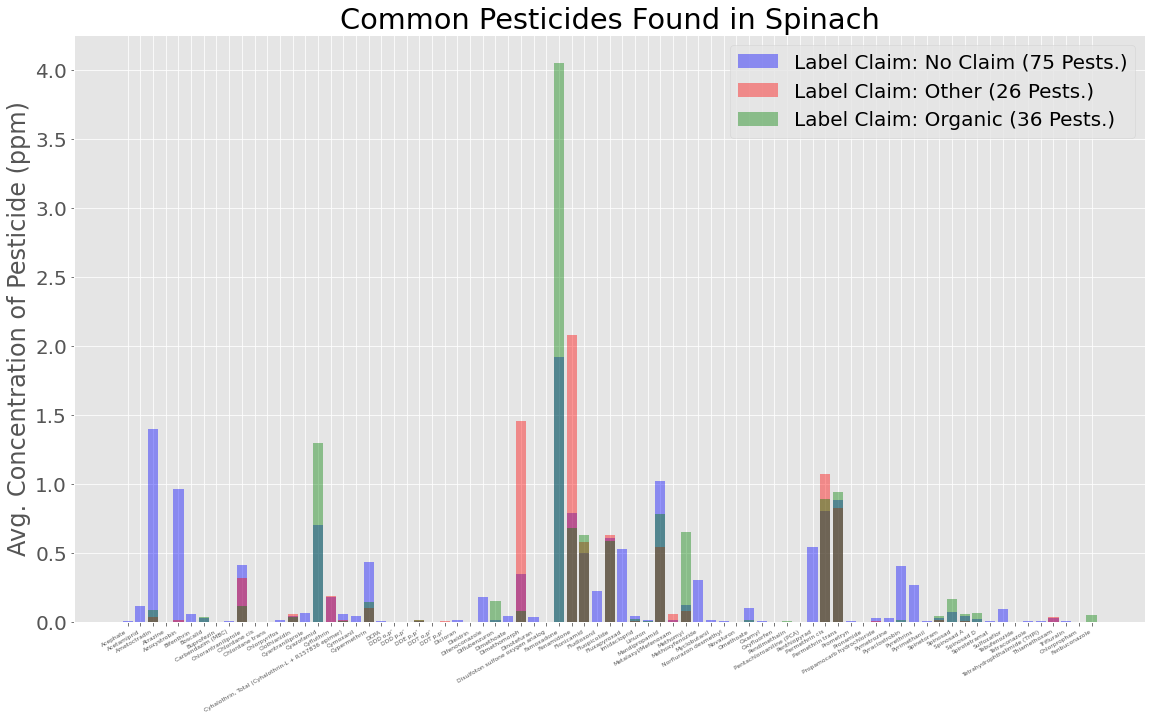

In [1102]:
# Plot figure of the most common pesticdes in Spinach

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig = plt.figure()
plt.rcParams['font.size'] = 20
fig, axs = plt.subplots(figsize = (19.20, 10.80)) #(44, 26)
axs.bar(spinach_NC['Pesticide Name'], spinach_NC['CONCEN'], label ='Label Claim: No Claim ({} Pests.)'.format(spinach_NC['Pesticide Name'].count()), color = 'b', alpha = 0.4)
axs.bar(spinach_OT['Pesticide Name'], spinach_OT['CONCEN'], label ='Label Claim: Other ({} Pests.)'.format(spinach_OT['Pesticide Name'].count()), color = 'r', alpha = 0.4)
axs.bar(spinach_PO['Pesticide Name'], spinach_PO['CONCEN'], label ='Label Claim: Organic ({} Pests.)'.format(spinach_PO['Pesticide Name'].count()), color = 'g', alpha = 0.4)
axs.legend()

plt.draw()
axs.set_xticklabels(axs.get_xticklabels(), rotation=30, ha='right', fontsize = 6)
axs.set_ylabel('Avg. Concentration of Pesticide (ppm)')
axs.set_title ('Common Pesticides Found in Spinach')

plt.savefig('Common_Pests_Spinach.svg', format = 'svg', dpi = 1200)
plt.show()

<Figure size 432x288 with 0 Axes>

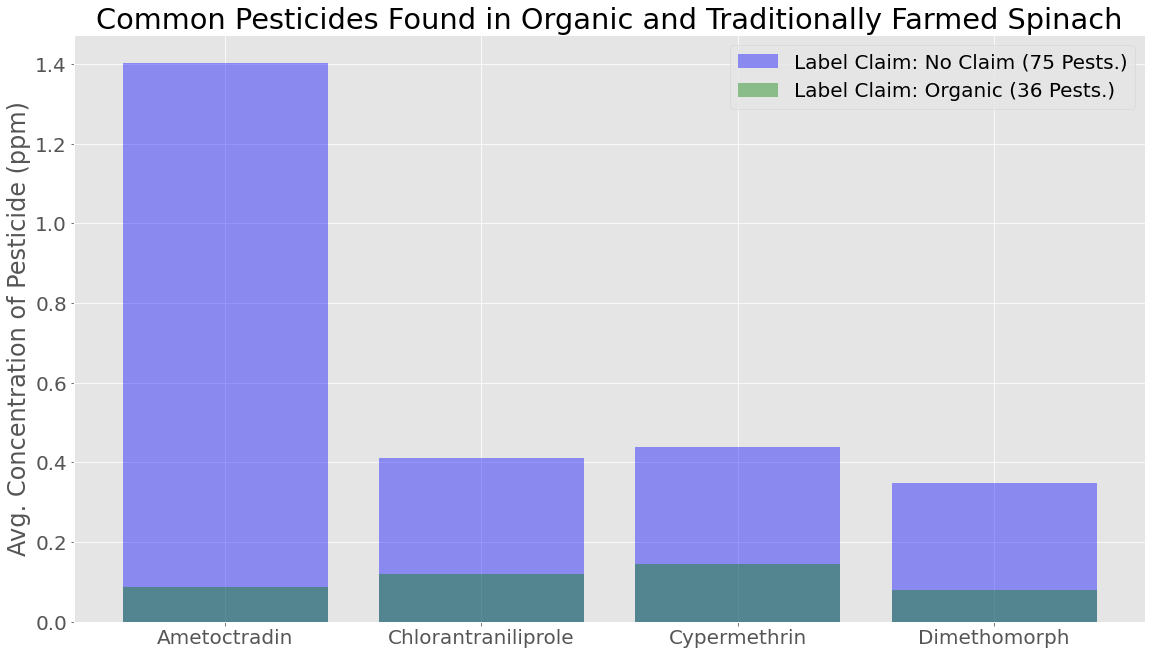

In [1103]:
# Create figure for the common pesticides in Spinach where there was a significant difference in the concentration of pesticides between "Organic" and "No Claim" label claims

fig = plt.figure()
plt.rcParams['font.size'] = 20
fig, axs = plt.subplots(figsize = (19.20, 10.80)) #(44, 26)
pest_name_NC = spinach_NC[spinach_NC['Pesticide Name'].isin(['Ametoctradin', 'Chlorantraniliprole', 'Cypermethrin', 'Dimethomorph'])]['Pesticide Name']
pest_cocn_NC = spinach_NC[spinach_NC['Pesticide Name'].isin(['Ametoctradin', 'Chlorantraniliprole', 'Cypermethrin', 'Dimethomorph'])]['CONCEN']
pest_name_PO = spinach_PO[spinach_PO['Pesticide Name'].isin(['Ametoctradin', 'Chlorantraniliprole', 'Cypermethrin', 'Dimethomorph'])]['Pesticide Name']
pest_cocn_PO = spinach_PO[spinach_PO['Pesticide Name'].isin(['Ametoctradin', 'Chlorantraniliprole', 'Cypermethrin', 'Dimethomorph'])]['CONCEN']

axs.bar(pest_name_NC, pest_cocn_NC, label ='Label Claim: No Claim ({} Pests.)'.format(spinach_NC['Pesticide Name'].count()), color = 'b', alpha = 0.4)
axs.bar(pest_name_PO, pest_cocn_PO, label ='Label Claim: Organic ({} Pests.)'.format(spinach_PO['Pesticide Name'].count()), color = 'g', alpha = 0.4)
axs.legend()

plt.draw()
axs.set_xticklabels(axs.get_xticklabels(), rotation=0, ha='center')
axs.set_ylabel('Avg. Concentration of Pesticide (ppm)')
axs.set_title ('Common Pesticides Found in Organic and Traditionally Farmed Spinach')
plt.savefig('Common_Pests_Spinach_NC_PO.svg', format = 'svg', dpi = 1200)